# Extracting

In [8]:
import cv2
import numpy as np
def fill_holes(mask):
    # Copy the mask to preserve the original
    filled_mask = mask.copy()

    # Perform morphological closing to fill the holes
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
    filled_mask = cv2.morphologyEx(filled_mask, cv2.MORPH_CLOSE, kernel)

    return filled_mask
def trimmer(image,image_mask,threshold:int=3000):
    x=np.where(image_mask.sum(axis=(0,1))>threshold)[0]
    y=np.where(image_mask.sum(axis=(1,2))>threshold)[0]
    z=np.where(image_mask.sum(axis=(0,2))>threshold)[0]
    return image[y[0]:y[-1],z[0]:z[-1],x[0]:x[-1]]
def erode_and_fill(mask):
    for idx,m in enumerate(mask):
        kernel = np.ones((20, 20), np.uint8)  # Adjust the kernel size as needed
        filled_mask = fill_holes(m)
        eroded_mask = cv2.erode(filled_mask, kernel, iterations=1)
        
        mask[idx,:,:] = eroded_mask
    return mask

In [ ]:
import glob
import os
import nibabel as nib
paths=glob.glob("transfer_data23/*.nii")
path_to_change="transfer_data23/"
output_dir="outputs23"
for idx,imagx in enumerate(paths):
    try:
        os.mkdir(output_dir)
    except:
        pass
    mask=nib.load(imagx.replace('transfer_data23','transfer_data23/masks/unet_CT_SS_2023530_115030/predictions'))
    image=nib.load(imagx)
    mask_data=mask.get_fdata()
    image_data=image.get_fdata()
    eroded_mask = erode_and_fill(mask_data)

    image_data=image_data*eroded_mask

    image_data=trimmer(image_data,eroded_mask,300)
    
    image_data[image_data<0]=0
    img = nib.Nifti1Image(image_data, image.affine, image.header)
    nib.save(img,output_dir+f'/patient{idx}.nii.gz')

In [1]:
import nibabel as nib
seg=nib.load('/home/abdullah/BOUN/MIPA/MIPA/CT_BET/results_folder/unet_CT_SS_2023528_123217/predictions/1.2.410.200010.20230508.145831.100041.127011_Beyin+Boyun_Anjio_Head_20230504005400_201.nii')

In [2]:
im=nib.load("/home/abdullah/BOUN/MIPA/MIPA/transfer_data22/deneme.nii")

In [3]:
im_d=im.get_fdata()
seg_d=seg.get_fdata()

In [7]:
masked=im_d[:,:,0:119]*seg_d

# Vessel Segmentation

In [12]:

import numpy as np
import nibabel as nib
from nibabel import processing
import cv2
data=nib.load("/home/abdullah/BOUN/MIPA/MIPA/outputs23/patient0.nii.gz")
data=processing.smooth_image(data,3)
image_data=data.get_fdata()
def window(image,wl,ww,threshold):
    high_bound=wl+(ww/2)
    low_bound=wl-(ww/2)
    mask1=(image<high_bound)*(image>low_bound)
    mask2=(image<threshold)*(image>50)
    
    return (mask1+mask2),(image)*(mask1+mask2)

image_filtered,org=window(image_data,60,20,200)

In [ ]:
maskc=nib.Nifti1Image(image_filtered,data.affine,data.header)
nib.save(maskc,'outputs2/vessels.nii')

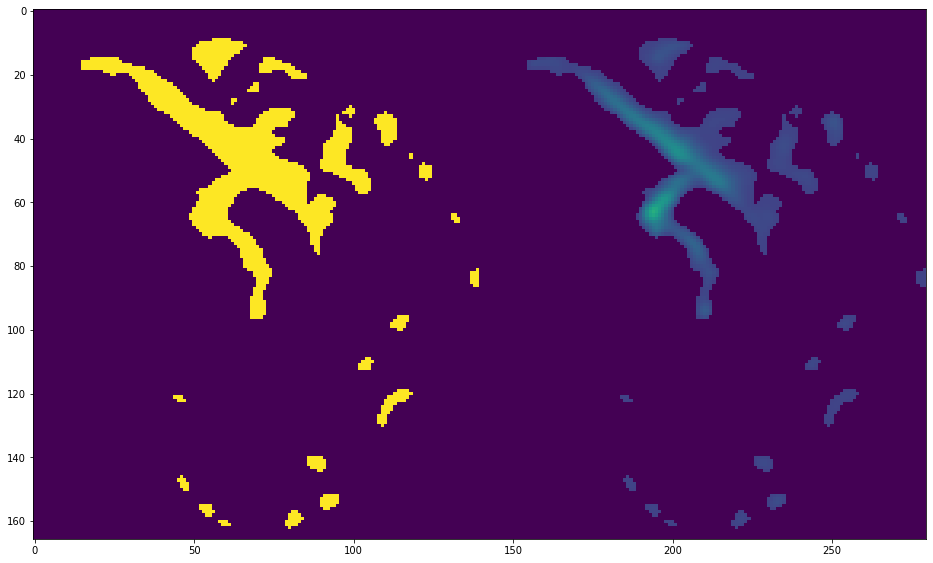

In [24]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,16))
slice=77
plt.imshow(np.hstack((255*image_filtered[slice,:,:],org[slice,:,:])))

In [9]:
import numpy as np
import nibabel as nib
from nibabel import processing
import cv2
data=nib.load("1.2.410.200010.20230508.145831.100041/1.2.410.200010.20230508.145831.100041.124908/AXIAL/1.2.410.200010.20230508.145831.100041.124908_Beyin+Boyun_Anjio_Head_20230504005400_702.nii")
mask=nib.load("CT_BET/results_folder/unet_CT_SS_2023529_145121/predictions/deneme2.nii")
data=processing.smooth_image(data,3)
image_data=data.get_fdata()
def window(image,wl,ww,threshold,mask):
    high_bound=wl+(ww/2)
    low_bound=wl-(ww/2)
    eroded_mask = erode_and_fill(mask)

    mask1=(image<high_bound)*(image>low_bound)
    mask2=(image<threshold)*(image>50)
    
    return (mask1+mask2)*eroded_mask,(image)*(mask1+mask2),eroded_mask
image_filtered,org,eroded_mask=window(image_data,60,20,200,mask.get_fdata())

-9.0